In [1]:
import seaborn as sb
import pandas as pd
import numpy as np
import missingno as msno
import pickle

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
import sklearn.metrics as metrics 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load dataset and set the 'userId' column as the index
df_model = pd.read_csv(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\df_model.csv')
df_model = df_model.set_index('userId')
df_model.info()  

<class 'pandas.core.frame.DataFrame'>
Index: 4008 entries, 4e3842f79b70e7ea57000064 to CRYq7MGpxHpEKfWhmwJygGmRNadHkC9XxPjktwvaiLm6Te2qcCzBYw1uA==
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   4008 non-null   float64
 1   counts_pictures       4008 non-null   float64
 2   counts_profileVisits  4008 non-null   float64
 3   counts_kisses         4008 non-null   float64
 4   lastOnlineTs          4008 non-null   float64
 5   lang_count            4008 non-null   float64
 6   lang_fr               4008 non-null   float64
 7   countDetails          4008 non-null   float64
 8   distance              4008 non-null   float64
 9   mobile                4008 non-null   float64
 10  online                4008 non-null   float64
 11  connectedToFacebook   4008 non-null   float64
 12  genderLooking         4008 non-null   int64  
 13  counts_fans           4008 non-null   float64
 14 

In [4]:
# Define the target variable ('counts_kisses') and the feature set (all other columns)
X = df_model.drop(columns=['counts_kisses'])
y = df_model['counts_kisses']

# Calculate the total number of samples in the dataset
total_samples = len(df_model)

# Split the data into training and temporary (test + dev) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Further split the temporary set into development (dev) and test sets
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Calculate the percentage size of each dataset split
train_percent = (X_train.shape[0] / total_samples) * 100
dev_percent = (X_dev.shape[0] / total_samples) * 100
test_percent = (X_test.shape[0] / total_samples) * 100

# Output the sizes of each set in percentages
print(f"Training set size: {train_percent:.2f}%")
print(f"Validation (Dev) set size: {dev_percent:.2f}%")
print(f"Testing set size: {test_percent:.2f}%")

Training set size: 69.99%
Validation (Dev) set size: 15.00%
Testing set size: 15.02%


In [5]:
# Define a function to compute regression evaluation metrics
def regressionMetrics(y, yhat):
    res = {
        'MSE': metrics.mean_squared_error(y, yhat),
        'RMSE': np.sqrt(metrics.mean_squared_error(y, yhat)),
        'MAE': metrics.mean_absolute_error(y, yhat),
        'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, yhat))
    }
    return res

In [6]:
# Initialize dataframes to store evaluation results for each model
models_list = pd.DataFrame()
models_list_dev = pd.DataFrame()
models_list_test = pd.DataFrame()

In [7]:
# Train and evaluate Linear Regression model
mod1 = LinearRegression()
mod1.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on training and development sets
pred1 = mod1.predict(X_train)
pred1_dev = mod1.predict(X_dev)

In [9]:
# Ensure there are no zero or negative values for RMSLE calculation
pred1_pos = np.maximum(pred1, 0)  
pred1_dev_pos = np.maximum(pred1_dev, 0)

In [10]:
# Store evaluation metrics for Linear Regression model
model_dict = {'model': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred1_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

model_dict_dev = {'model_dev': "Linear Regression"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred1_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

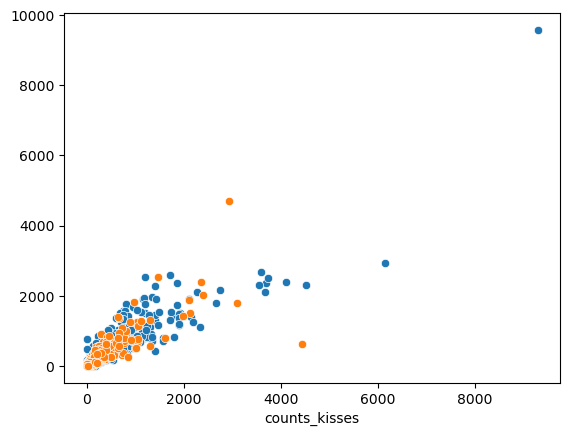

In [11]:
# Plot predicted vs. actual values for Linear Regression model
sb.scatterplot(x=y_train, y=pred1_pos)
sb.scatterplot(x=y_dev, y=pred1_dev_pos)

In [12]:
# Train and evaluate Decision Tree Regressor model
mod2 = DecisionTreeRegressor(random_state=1)
mod2.fit(X_train, y_train)

DecisionTreeRegressor(random_state=1)

In [13]:
# Predict on training and development sets
pred2 = mod2.predict(X_train)
model_dict = {'model': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred2)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred2_dev = mod2.predict(X_dev)
model_dict_dev = {'model_dev': "Decision Tree"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred2_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

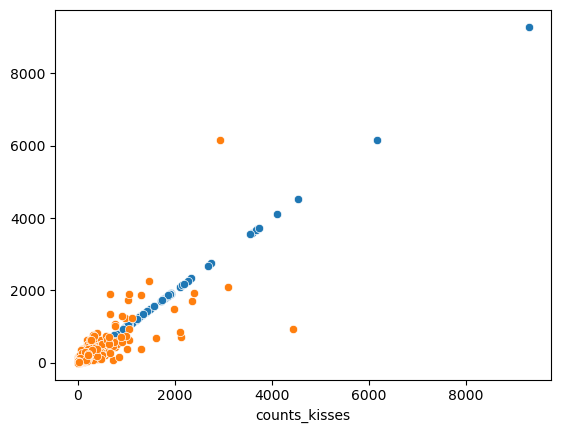

In [14]:
# Plot predicted vs. actual values for Decision Tree model
sb.scatterplot(x=y_train, y=pred2)
sb.scatterplot(x=y_dev, y=pred2_dev)

In [15]:
# Train and evaluate Random Forest Regressor model
mod3 = RandomForestRegressor(random_state=1)
mod3.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [16]:
# Predict on training and development sets
pred3 = mod3.predict(X_train)
model_dict = {'model': "RandomForest"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred3)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred3_dev = mod3.predict(X_dev)
model_dict_dev = {'model_dev': "RandomForest"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred3_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

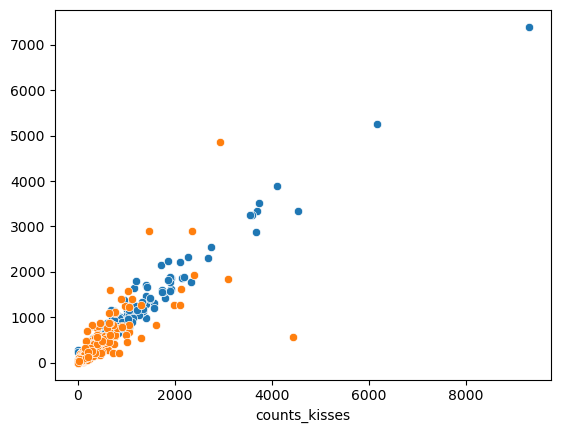

In [17]:
# Plot predicted vs. actual values for Random Forest model
sb.scatterplot(x=y_train, y=pred3)
sb.scatterplot(x=y_dev, y=pred3_dev)

In [18]:
# Train and evaluate AdaBoost Regressor model
mod4 = AdaBoostRegressor(random_state=1)
mod4.fit(X_train, y_train)

AdaBoostRegressor(random_state=1)

In [19]:
# Predict on training and development sets
pred4 = mod4.predict(X_train)
model_dict = {'model': "ADABoost"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred4)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred4_dev = mod4.predict(X_dev)
model_dict_dev = {'model_dev': "ADABoost"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred4_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

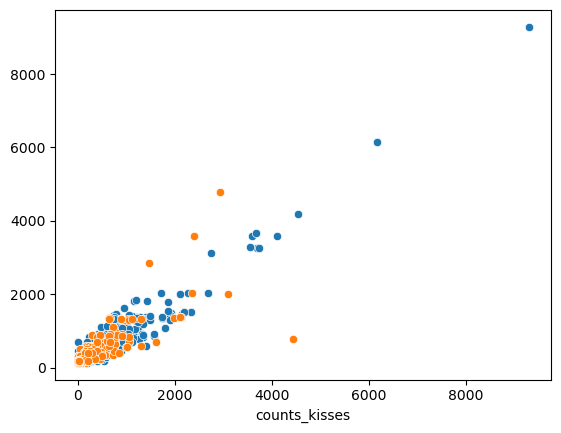

In [20]:
# Plot predicted vs. actual values for AdaBoost model
sb.scatterplot(x=y_train, y=pred4)
sb.scatterplot(x=y_dev, y=pred4_dev)

In [21]:
# Train and evaluate Gradient Boosting Regressor model
mod5 = GradientBoostingRegressor(random_state=1)
mod5.fit(X_train, y_train)

GradientBoostingRegressor(random_state=1)

In [22]:
# Predict on training and development sets
pred5 = mod5.predict(X_train)
pred5_dev = mod5.predict(X_dev)

# Ensure there are no zero or negative values for RMSLE calculation
pred5_pos = np.maximum(pred5, 0)  
pred5_dev_pos = np.maximum(pred5_dev, 0) 

In [23]:
# Store evaluation metrics for Gradient Boosting model
model_dict = {'model': "GBM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred5_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

model_dict_dev = {'model_dev': "GBM"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred5_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

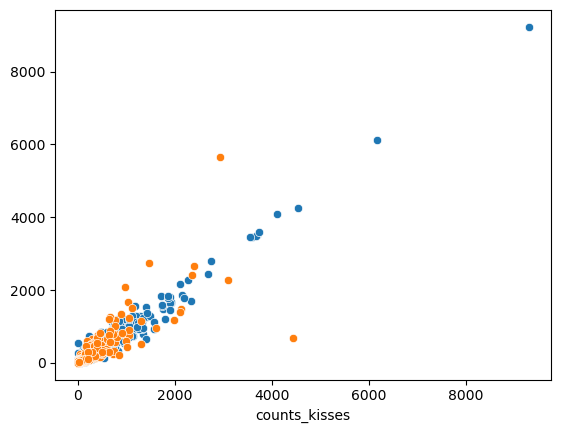

In [24]:
# Plot predicted vs. actual values for Gradient Boosting model
sb.scatterplot(x=y_train, y=pred5_pos)
sb.scatterplot(x=y_dev, y=pred5_dev_pos)

In [25]:
# Train and evaluate Support Vector Regressor (SVM)
mod6 = SVR()
mod6.fit(X_train, y_train)

SVR()

In [26]:
# Predict on training and development sets
pred6 = mod6.predict(X_train)
model_dict = {'model': "SVM"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred6)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

pred6_dev = mod6.predict(X_dev)
model_dict_dev = {'model_dev': "SVM"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred6_dev)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

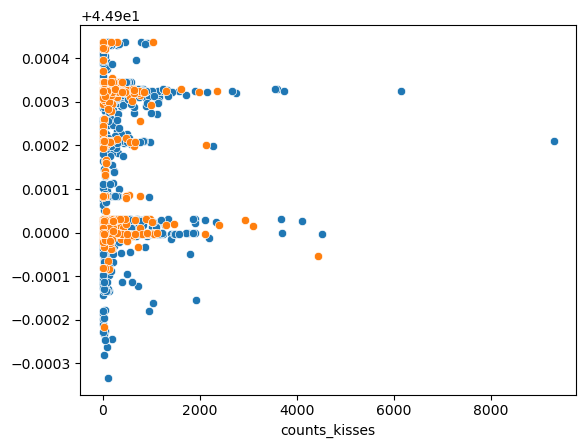

In [27]:
# Plot predicted vs. actual values for SVM model
sb.scatterplot(x=y_train, y=pred6)
sb.scatterplot(x=y_dev, y=pred6_dev)

In [28]:
# Train and evaluate XGBoost Regressor model
mod7 = xgb.XGBRegressor()
mod7.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [29]:
# Predict on training and development sets
pred7 = mod7.predict(X_train)
pred7_dev = mod7.predict(X_dev)

# Ensure there are no zero or negative values for RMSLE calculation
pred7_pos = np.maximum(pred7, 0)  
pred7_dev_pos = np.maximum(pred7_dev, 0)  

In [30]:
# Store evaluation metrics for XGBoost model
model_dict = {'model': "XGBOOST"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred7_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

model_dict_dev = {'model_dev': "XGBOOST"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred7_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

<Axes: xlabel='counts_kisses'>

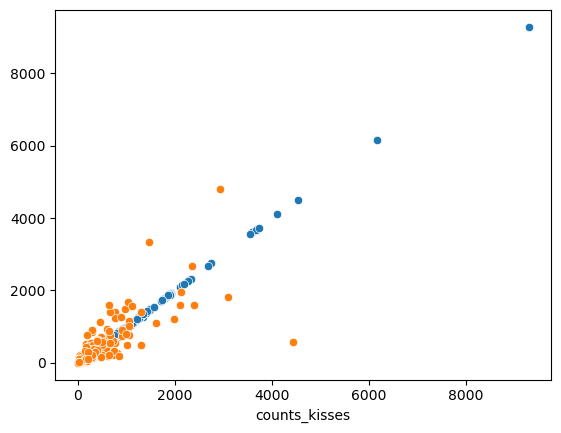

In [31]:
# Plot predicted vs. actual values for XGBoost model
sb.scatterplot(x=y_train, y=pred7_pos)
sb.scatterplot(x=y_dev, y=pred7_dev_pos)

In [32]:
# Save the evaluation results to a CSV file
models_list.to_csv(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\metrics_train.csv')
models_list_dev.to_csv(r'C:\Users\matar.aviv\Desktop\python\Data Science Bar Ilan\ML Project - Dating App\metrics_dev.csv')


In [33]:
models_list.sort_values('MAE')

,model,MSE,RMSE,MAE,RMSLE
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
6,XGBOOST,294.770142,17.168871,10.717069,0.510222
2,RandomForest,4901.465203,70.010465,21.814075,0.345265
4,GBM,6673.562572,81.691876,42.332449,0.848068
0,Linear Regression,25806.005455,160.642477,64.704356,1.350842
5,SVM,161299.487775,401.621075,139.424408,1.796727
3,ADABoost,32009.299557,178.911429,154.288314,2.278057


In [34]:
models_list_dev.sort_values('MAE')

,model_dev,MSE,RMSE,MAE,RMSLE
2,RandomForest,54174.012680,232.753115,72.380050,0.602751
4,GBM,56955.436840,238.653382,74.290338,0.856227
6,XGBOOST,58872.564723,242.636693,76.401034,0.775028
0,Linear Regression,50416.240850,224.535612,77.018828,1.349811
1,Decision Tree,68230.594010,261.209866,86.028286,0.818971
5,SVM,158872.280582,398.587858,155.004150,1.806833
3,ADABoost,71672.009402,267.716285,175.851780,2.245301


In [35]:
models_list_dev

,model_dev,MSE,RMSE,MAE,RMSLE
0,Linear Regression,50416.240850,224.535612,77.018828,1.349811
1,Decision Tree,68230.594010,261.209866,86.028286,0.818971
2,RandomForest,54174.012680,232.753115,72.380050,0.602751
3,ADABoost,71672.009402,267.716285,175.851780,2.245301
4,GBM,56955.436840,238.653382,74.290338,0.856227
5,SVM,158872.280582,398.587858,155.004150,1.806833
6,XGBOOST,58872.564723,242.636693,76.401034,0.775028


In [36]:
# Define the parameter grid to search for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the ensemble
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at each split
    'max_depth': [None, 10, 20, 30, 40, 50],  # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at each leaf node
}

In [37]:
# Create a base Random Forest model

# Fine-tuning Random Forest model using GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=mod3,  # Random Forest regressor model
    param_grid=param_grid,  # Hyperparameter grid to search
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=2,  # Detailed output for each iteration
    scoring='neg_mean_squared_error'  # Evaluation metric: negative mean squared error
)

In [38]:
# Fit GridSearchCV to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score for Random Forest (convert negative MSE to positive MSE)
print("Best Parameters (RF):", grid_search_rf.best_params_)
print("Best Score (MSE):", -grid_search_rf.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
423 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\matar.aviv\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    val

Best Parameters (RF): {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score (MSE): 49334.746698244206


In [39]:
# Predict on the training data using the best Random Forest model
pred8 = grid_search_rf.predict(X_train)

# Replace negative predictions with zero for development data
pred8_pos = np.maximum(pred8, 0)

# Add the model's training performance metrics to models_list
model_dict = {'model': "rf_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred8_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

In [40]:

# Predict on the development data using the best Random Forest model
pred8_dev = grid_search_rf.predict(X_dev)

# Replace negative predictions with zero for development data
pred8_dev_pos = np.maximum(pred8_dev, 0)

# Add the model's development performance metrics to models_list_dev
model_dict_dev = {'model_dev': "rf_FT"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred8_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

In [45]:
# Fine-tuning XGBoost model using GridSearchCV
# Instantiate GridSearchCV with XGBoost model and defined parameter grid
grid_search_xgb = GridSearchCV(
    estimator=mod7,  # XGBoost regressor model
    param_grid=param_grid,  # Hyperparameter grid to search
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=2,  # Detailed output for each iteration
    scoring='neg_mean_squared_error'  # Evaluation metric: negative mean squared error
)

In [46]:
# Fit GridSearchCV to the training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score (convert negative MSE to positive MSE)
print("Best Parameters (XGB):", grid_search_xgb.best_params_)
print("Best Score (MSE):", -grid_search_xgb.best_score_)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[13:02:50] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Best Parameters (XGB): {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Score (MSE): 38283.54682097651


In [47]:
# Predict on the training data using the best XGBoost model
pred9 = grid_search_xgb.predict(X_train)

# Replace any negative predictions with zero (since target cannot be negative)
pred9_pos = np.maximum(pred9, 0)

# Add the model's training performance metrics to models_list
model_dict = {'model': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict, **regressionMetrics(y_train, pred9_pos)}])
models_list = pd.concat([models_list, new_row], ignore_index=True)

In [48]:
# Predict on the development data using the best XGBoost model
pred9_dev = grid_search_xgb.predict(X_dev)

# Replace negative predictions with zero for development data
pred9_dev_pos = np.maximum(pred9_dev, 0)

# Add the model's development performance metrics to models_list_dev
model_dict_dev = {'model_dev': "XGB_FT"}
new_row = pd.DataFrame([{**model_dict_dev, **regressionMetrics(y_dev, pred9_dev_pos)}])
models_list_dev = pd.concat([models_list_dev, new_row], ignore_index=True)

In [49]:
models_list

,model,MSE,RMSE,MAE,RMSLE
0,Linear Regression,25806.005455,160.642477,64.704356,1.350842
1,Decision Tree,0.000000,0.000000,0.000000,0.000000
2,RandomForest,4901.465203,70.010465,21.814075,0.345265
3,ADABoost,32009.299557,178.911429,154.288314,2.278057
4,GBM,6673.562572,81.691876,42.332449,0.848068
5,SVM,161299.487775,401.621075,139.424408,1.796727
6,XGBOOST,294.770142,17.168871,10.717069,0.510222
7,rf_FT,6348.055607,79.674686,25.096365,0.595228
8,XGB_FT,34.107287,5.840144,3.690213,0.287636


In [50]:
models_list_dev

,model_dev,MSE,RMSE,MAE,RMSLE
0,Linear Regression,50416.240850,224.535612,77.018828,1.349811
1,Decision Tree,68230.594010,261.209866,86.028286,0.818971
2,RandomForest,54174.012680,232.753115,72.380050,0.602751
3,ADABoost,71672.009402,267.716285,175.851780,2.245301
4,GBM,56955.436840,238.653382,74.290338,0.856227
5,SVM,158872.280582,398.587858,155.004150,1.806833
6,XGBOOST,58872.564723,242.636693,76.401034,0.775028
7,rf_FT,47338.665958,217.574507,75.260300,0.961345
8,XGB_FT,56154.138898,236.968645,72.234142,0.690394


In [43]:
# Evaluate the chosen model on the test data

# Assuming rf_FT is the chosen model
# You may need to replace rf_FT with grid_search_rf.best_estimator_ if grid search is used
chosen_model = grid_search_rf.best_estimator_  # For Random Forest
# chosen_model = grid_search_xgb.best_estimator_  # If XGBoost is chosen
chosen_model

RandomForestRegressor(max_features='sqrt', n_estimators=200, random_state=1)

In [44]:
# Predict on the test data
pred_test = chosen_model.predict(X_test)

# Ensure predictions are non-negative (if applicable)
pred_test_pos = np.maximum(pred_test, 0)  # Adjusting for any negative values

# Calculate and print metrics for the test set
test_metrics = regressionMetrics(y_test, pred_test_pos)
print("Test Metrics:", test_metrics)

# Optionally, add the test results to your model results DataFrame
model_dict_test = {'model_test': "rf_FT"}  # Change "rf_FT" to "XGB_FT" if using XGBoost
new_row_test = pd.DataFrame([{**model_dict_test, **test_metrics}])
models_list_test = pd.concat([models_list_test, new_row_test], ignore_index=True)
models_list_test


Test Metrics: {'MSE': 20472.605295930232, 'RMSE': 143.08251219464324, 'MAE': 65.34715946843853, 'RMSLE': 0.9378647677993182}


,model_test,MSE,RMSE,MAE,RMSLE
0,rf_FT,20472.605296,143.082512,65.347159,0.937865


In [51]:
# Evaluate the chosen model on the test data

# You may need to replace rf_FT with grid_search_rf.best_estimator_ if grid search is used
chosen_model_xgb = grid_search_xgb.best_estimator_  # If XGBoost is chosen
chosen_model_xgb

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_features='auto', max_leaves=0,
             min_child_weight=1, min_samples_leaf=1, min_samples_split=2,
             missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
             num_parallel_tree=1, predictor='auto', ...)

In [52]:
# Predict on the test data
pred_test_xgb = chosen_model_xgb.predict(X_test)

# Ensure predictions are non-negative (if applicable)
pred_test_pos_xgb = np.maximum(pred_test_xgb, 0)  # Adjusting for any negative values

# Calculate and print metrics for the test set
test_metrics = regressionMetrics(y_test, pred_test_pos_xgb)
print("Test Metrics:", test_metrics)

# Optionally, add the test results to your model results DataFrame
model_dict_test = {'model_test': "XGB_FT"}  # Change "rf_FT" to "XGB_FT" if using XGBoost
new_row_test = pd.DataFrame([{**model_dict_test, **test_metrics}])
models_list_test = pd.concat([models_list_test, new_row_test], ignore_index=True)
models_list_test


Test Metrics: {'MSE': 25166.422413787917, 'RMSE': 158.63928395510337, 'MAE': 60.30291770297131, 'RMSLE': 0.6291326172846549}


,model_test,MSE,RMSE,MAE,RMSLE
0,rf_FT,20472.605296,143.082512,65.347159,0.937865
1,XGB_FT,25166.422414,158.639284,60.302918,0.629133
